<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

# Exercício 1: Poisson via Inversão Recursiva

Implemente uma função `poisson_recursivo(lam)` que gera uma variável aleatória com distribuição Poisson($\lambda$) utilizando o método de inversão recursiva visto em sala.

1. Gere amostras de tamanho 10.000 para os seguintes valores de $\lambda$: 1, 5, 10, 50, 100.

2. Verifique empiricamente que a distribuição Binomial($n$, $p$) se aproxima de uma Poisson($\lambda$) quando $n$ é grande e $p = \lambda/n$.

   - Fixe $\lambda = 10$ e use $n = 1000$, $p = 0.01$.
   - Gere uma amostra de tamanho 1.000 de $X \sim \text{Binomial}(n, p)$.
   - Gere uma amostra de tamanho 1.000 de $Y \sim \text{Poisson}(\lambda)$ usando sua função.
   - Compare os histogramas das duas amostras.


(array([[1.2400e+02, 5.6300e+03, 3.5859e+04, 4.5319e+04, 1.2473e+04,
         5.9100e+02, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0450e+03, 1.1809e+04, 3.2851e+04, 3.3376e+04, 1.6018e+04,
         4.2140e+03, 6.2700e+02, 5.7000e+01, 1.0000e+00, 1.0000e+00]]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 2 BarContainer objects>)

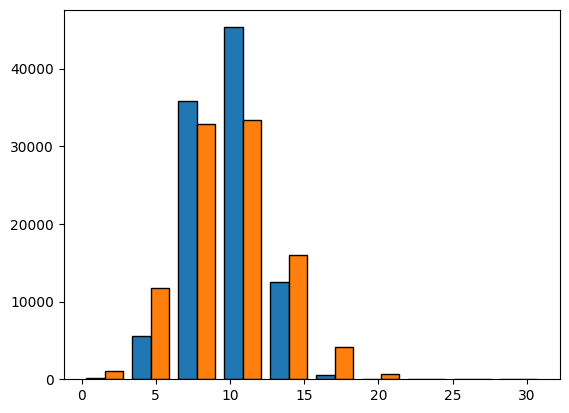

In [ ]:

def binomial(n,p):
  results = []
  for _ in range(n):
    x = np.random.uniform()
    if x <= p:
      results.append(1)
    else:
       results.append(0)
  return sum(results)



def poisson_recursivo(lam):
  p = np.exp(-lam)
  F = p

  U = np.random.uniform(low=0,high=1)
  i = 0
  while F < U:
    i += 1
    p = p * lam / i
    F += p

  return i

a = [poisson_recursivo(1) for _ in range(10000)]
b = [poisson_recursivo(5) for _ in range(10000)]
c = [poisson_recursivo(10) for _ in range(10000)]
d = [poisson_recursivo(50) for _ in range(10000)]
e = [poisson_recursivo(100) for _ in range(10000)]


teste = [binomial(20,10/20) for _ in range(10000)]
plt.hist([teste,c], edgecolor='black')

# Exercício 2: Geométrica

1. Implemente um gerador de variáveis aleatórias com distribuição Geométrica($p$) utilizando **dois métodos**:

   - **Versão ingênua (naive):** gerar sucessivamente variáveis Bernoulli($p$) até obter o primeiro sucesso;
   - **Versão via inversão:** como vimos nas notas de aula.

2. Para um valor fixo de $p$, gere uma amostra de tamanho $10^5$ utilizando ambos os métodos.

3. Compare os **tempos de execução** dos dois métodos.

4. Compare também as **densidades empíricas** obtidas com a distribuição gerada pela função `numpy.random.geometric`.

5. Repita a comparação dos tempos para valores pequenos e grandes de $p$ (por exemplo, $p = 0.1$ e $p = 0.9$) e discuta como isso afeta a eficiência de cada método.


(array([6.132e+03, 2.211e+03, 9.180e+02, 4.500e+02, 1.500e+02, 8.700e+01,
        3.400e+01, 1.100e+01, 5.000e+00, 2.000e+00]),
 array([ 1. ,  9.3, 17.6, 25.9, 34.2, 42.5, 50.8, 59.1, 67.4, 75.7, 84. ]),
 <BarContainer object of 10 artists>)

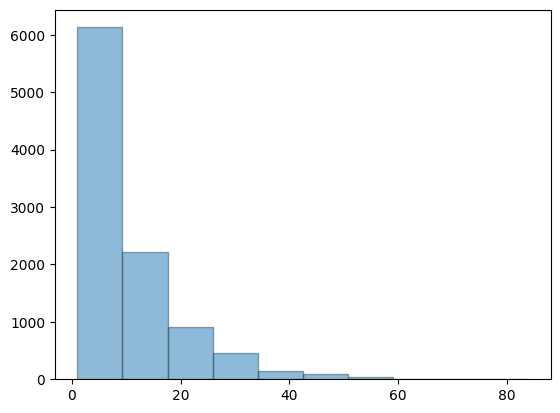

In [ ]:
def geometrica_naive(p):
  aa = binomial(1,p)
  i = 0
  while aa != 1:
    i += 1
    aa = binomial(1,p)

  return i

#plt.hist([geometrica_naive(0.1) for _ in range(10000)], edgecolor="darkslategray")

def geometrica_inversao(p):
  u = np.random.uniform()
  return int(np.log(u)/np.log(1-p)) + 1

plt.hist([geometrica_inversao(0.1) for _ in range(10000)], edgecolor="darkslategray", alpha=0.5)

# Exercício 3: Binomial Negativa

1. Implemente um gerador de variáveis aleatórias com distribuição $\mathrm{NegBin}(r, p)$ (número de **ensaios até o $r$-ésimo sucesso**) utilizando **três métodos**:

   - **Versão soma de Bernoullis:** simule sucessivos ensaios $B_i \sim \mathrm{Bernoulli}(p)$ até acumular $r$ sucessos.  
     O número total de ensaios realizados corresponde ao valor de $X$.

   - **Versão soma de geométricas:** gere $r$ variáveis $X_i \sim \text{Geom}(p)$ via inversão, e defina
     $$
     X = X_1 + \cdots + X_r.
     $$

   - **Versão via inversão recursiva:** use $U \sim \text{Uniforme}(0, 1)$, inicialize $n = r$, $p_r = p^r$, $F = p_r$, e atualize
     $$
     p_{n+1} = p_n \cdot \frac{n}{n - r + 1}(1 - p),
     \qquad F \leftarrow F + p_{n+1},
     $$
     até encontrar o menor $n$ tal que $F \ge U$.

2. Para valores fixos de $r$ e $p$ (por exemplo, $r = 5$, $p = 0.3$), gere uma amostra de tamanho $10^5$ utilizando os três métodos.

3. Compare os resultados com a função `numpy.random.negative_binomial(r, p)`:
   $$
   X_{\text{NumPy}} = Y_{\text{NumPy}} + r,
   $$
   onde `numpy.random.negative_binomial(r, p)` retorna $Y$ = número de falhas antes do $r$-ésimo sucesso.

4. Faça gráficos das distribuições empíricas dos quatro métodos e compare com a **PMF teórica**.

5. Compare também o **tempo de execução** dos três métodos de simulação (soma de Bernoullis, soma de geométricas, inversão recursiva) para diferentes valores de $r$ (ex.: $r = 5, 20$) e $p$ (ex.: $0.1, 0.3, 0.5, 0.7, 0.9$). Discuta como $r$ e $p$ afetam a eficiência de cada método.


(array([ 10.,  60., 132., 247., 454., 611., 781., 872., 908., 900., 908.,
        837., 664., 618., 463., 409., 287., 242., 173., 121.,  92.,  62.,
         43.,  29.,  30.,  11.,  14.,   7.,   3.,   4.,   3.,   3.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33.]),
 <BarContainer object of 33 artists>)

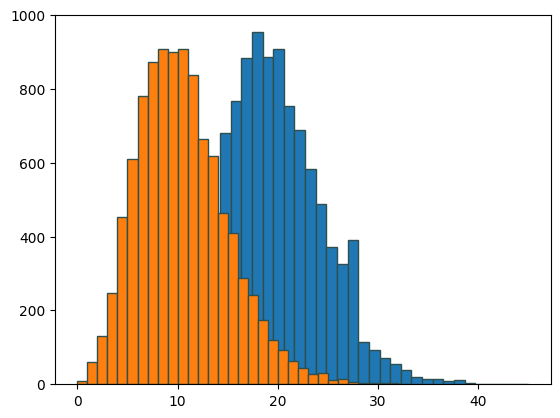

In [ ]:
def bin_neg_bernoulli(r,p):
  sucessos = 0
  b = binomial(1,p)
  ensaios = 0
  while sucessos < r:
    sucessos += b
    b = binomial(1,p)
    ensaios += 1

  return ensaios

amostra_1 = [bin_neg_bernoulli(10,0.5) for _ in range(10000)]

plt.hist(amostra_1, edgecolor="darkslategray", bins=33)
plt.hist([np.random.negative_binomial(10,0.5) for _ in range(10000)], edgecolor="darkslategray", bins=33)
# basta somar r para ir de numero de fracassos pra numero de ensaios


(array([ 58., 132., 299., 436., 622., 789., 853., 979., 927., 819., 761.,
        730., 616., 451., 379., 293., 406., 136.,  95.,  69.,  39.,  37.,
         29.,  16.,  10.,  10.,   4.,   0.,   3.,   0.,   0.,   1.,   1.]),
 array([10.        , 11.06060606, 12.12121212, 13.18181818, 14.24242424,
        15.3030303 , 16.36363636, 17.42424242, 18.48484848, 19.54545455,
        20.60606061, 21.66666667, 22.72727273, 23.78787879, 24.84848485,
        25.90909091, 26.96969697, 28.03030303, 29.09090909, 30.15151515,
        31.21212121, 32.27272727, 33.33333333, 34.39393939, 35.45454545,
        36.51515152, 37.57575758, 38.63636364, 39.6969697 , 40.75757576,
        41.81818182, 42.87878788, 43.93939394, 45.        ]),
 <BarContainer object of 33 artists>)

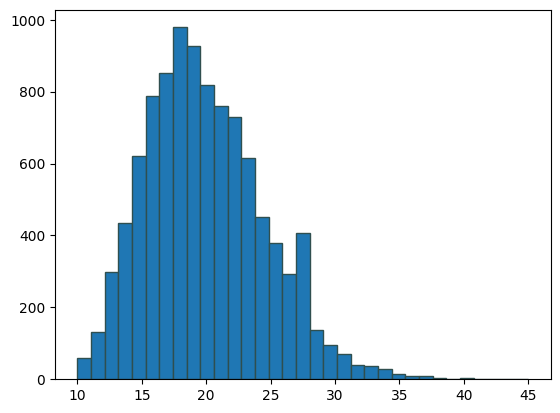

In [ ]:
def bin_neg_geometrica(r,p):
  result = 0
  for _ in range(r):
    result = result + geometrica_teorico(p)
  return result

amostra_2 = [bin_neg_geometrica(10,0.5) for _ in range(10000)]
plt.hist(amostra_2, edgecolor="darkslategray", bins=33)

(array([ 68., 129., 253., 445., 597., 749., 872., 931., 906., 938., 826.,
        701., 503., 524., 364., 294., 398., 151.,  93.,  83.,  62.,  54.,
         22.,  14.,   9.,   5.,   4.,   1.,   2.,   0.,   1.,   0.,   1.]),
 array([10.        , 11.06060606, 12.12121212, 13.18181818, 14.24242424,
        15.3030303 , 16.36363636, 17.42424242, 18.48484848, 19.54545455,
        20.60606061, 21.66666667, 22.72727273, 23.78787879, 24.84848485,
        25.90909091, 26.96969697, 28.03030303, 29.09090909, 30.15151515,
        31.21212121, 32.27272727, 33.33333333, 34.39393939, 35.45454545,
        36.51515152, 37.57575758, 38.63636364, 39.6969697 , 40.75757576,
        41.81818182, 42.87878788, 43.93939394, 45.        ]),
 <BarContainer object of 33 artists>)

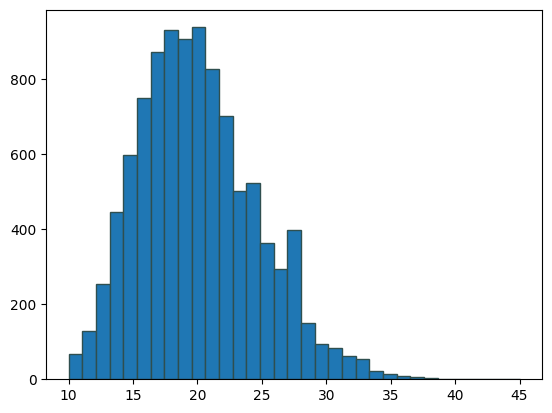

In [ ]:
def bin_neg_inversao(r,p_0):
  u = np.random.uniform()
  p = p_0**r
  F = p
  n = r
  while F < u:
    p = p * (n * (1-p_0) / (n-r+1))
    F += p
    n += 1

  return n

amostra_3 = [bin_neg_inversao(10,0.5) for _ in range(10000)]
plt.hist(amostra_3, edgecolor="darkslategray", bins=33)



# Exercício 4: Hipergeométrica

Implemente um gerador de variáveis aleatórias $X \sim \text{Hipergeom}(N,K,n)$ utilizando o **algoritmo de Fisher–Yates parcial** para realizar a amostragem sem reposição.  
Compare o histograma da amostra simulada com a distribuição teórica dada por `scipy.stats.hypergeom.pmf`.


<StemContainer object of 3 artists>

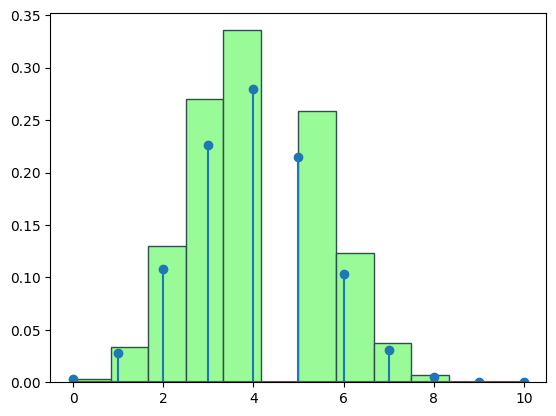

In [ ]:
x = np.arange(0,11)
pmf = scipy.stats.hypergeom(50,20,10).pmf(x)

def hipergeom(N,K,n):
  lista = [1]*K + [0]*(N-K)
  for i in range(n):
    j =  int(np.random.uniform() * (N-i)) + i
    lista[i],lista[j] = lista[j], lista[i]
  return sum(lista[:n])

amostra = [hipergeom(50,20,10) for _ in range(100000)]
plt.hist(amostra,edgecolor='darkslategray', bins=12, density=True, color='palegreen')
plt.stem(pmf)
